## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
        x = keras.layers.Dense(units=n_units, 
                               name="hidden_layer"+str(i+1))(x)
        x = keras.layers.Activation('relu')(x)
        x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    exp_name_tag = ("batch size-%s" % (batch_size))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0   

50000/50000 [==============================] - 379s 8ms/step - loss: 2.2411 - acc: 0.1671 - val_loss: 270187.7512 - val_acc: 0.1762
Epoch 45/50
50000/50000 [==============================] - 364s 7ms/step - loss: 2.2382 - acc: 0.1675 - val_loss: 137004.4559 - val_acc: 0.1859
Epoch 46/50
50000/50000 [==============================] - 361s 7ms/step - loss: 2.2381 - acc: 0.1669 - val_loss: 265083.9651 - val_acc: 0.1615
Epoch 47/50
50000/50000 [==============================] - 369s 7ms/step - loss: 2.2388 - acc: 0.1670 - val_loss: 247907.6651 - val_acc: 0.1647
Epoch 48/50
50000/50000 [==============================] - 379s 8ms/step - loss: 2.2407 - acc: 0.1678 - val_loss: 228405.9787 - val_acc: 0.1656
Epoch 49/50
50000/50000 [==============================] - 390s 8ms/step - loss: 2.2415 - acc: 0.1651 - val_loss: 116982.4738 - val_acc: 0.1754
Epoch 50/50
50000/50000 [==============================] - 378s 8ms/step - loss: 2.2418 - acc: 0.1663 - val_loss: 77437.3818 - val_acc: 0.1763
Model

50000/50000 [==============================] - 53s 1ms/step - loss: 0.7309 - acc: 0.7425 - val_loss: 1.3821 - val_acc: 0.5553
Epoch 39/50
50000/50000 [==============================] - 50s 1ms/step - loss: 0.7128 - acc: 0.7469 - val_loss: 1.4193 - val_acc: 0.5469
Epoch 40/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.7120 - acc: 0.7497 - val_loss: 1.4177 - val_acc: 0.5451
Epoch 41/50
50000/50000 [==============================] - 53s 1ms/step - loss: 0.6949 - acc: 0.7558 - val_loss: 1.4498 - val_acc: 0.5421
Epoch 42/50
50000/50000 [==============================] - 47s 937us/step - loss: 0.6904 - acc: 0.7553 - val_loss: 1.4199 - val_acc: 0.5520
Epoch 43/50
50000/50000 [==============================] - 48s 954us/step - loss: 0.6779 - acc: 0.7611 - val_loss: 1.4313 - val_acc: 0.5504
Epoch 44/50
50000/50000 [==============================] - 53s 1ms/step - loss: 0.6615 - acc: 0.7669 - val_loss: 1.4374 - val_acc: 0.5521
Epoch 45/50
50000/50000 [=================

50000/50000 [==============================] - 26s 530us/step - loss: 0.4756 - acc: 0.8319 - val_loss: 1.6859 - val_acc: 0.5368
Epoch 33/50
50000/50000 [==============================] - 27s 541us/step - loss: 0.4663 - acc: 0.8366 - val_loss: 1.6992 - val_acc: 0.5385
Epoch 34/50
50000/50000 [==============================] - 26s 523us/step - loss: 0.4552 - acc: 0.8386 - val_loss: 1.6865 - val_acc: 0.5442
Epoch 35/50
50000/50000 [==============================] - 31s 624us/step - loss: 0.4435 - acc: 0.8429 - val_loss: 1.7301 - val_acc: 0.5372
Epoch 36/50
50000/50000 [==============================] - 30s 609us/step - loss: 0.4238 - acc: 0.8496 - val_loss: 1.7269 - val_acc: 0.5403
Epoch 37/50
50000/50000 [==============================] - 26s 514us/step - loss: 0.4090 - acc: 0.8573 - val_loss: 1.7581 - val_acc: 0.5421
Epoch 38/50
50000/50000 [==============================] - 31s 625us/step - loss: 0.4125 - acc: 0.8543 - val_loss: 1.7613 - val_acc: 0.5332
Epoch 39/50
50000/50000 [=======

50000/50000 [==============================] - 13s 262us/step - loss: 0.2300 - acc: 0.9249 - val_loss: 2.0777 - val_acc: 0.5134
Epoch 27/50
50000/50000 [==============================] - 13s 262us/step - loss: 0.2134 - acc: 0.9311 - val_loss: 2.1322 - val_acc: 0.5115
Epoch 28/50
50000/50000 [==============================] - 13s 261us/step - loss: 0.1896 - acc: 0.9391 - val_loss: 2.1693 - val_acc: 0.5191
Epoch 29/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.1949 - acc: 0.9357 - val_loss: 2.1583 - val_acc: 0.5206
Epoch 30/50
50000/50000 [==============================] - 13s 262us/step - loss: 0.1649 - acc: 0.9480 - val_loss: 2.1967 - val_acc: 0.5159
Epoch 31/50
50000/50000 [==============================] - 13s 263us/step - loss: 0.1574 - acc: 0.9507 - val_loss: 2.2508 - val_acc: 0.5145
Epoch 32/50
50000/50000 [==============================] - 13s 262us/step - loss: 0.1525 - acc: 0.9524 - val_loss: 2.2681 - val_acc: 0.5225
Epoch 33/50
50000/50000 [=======

50000/50000 [==============================] - 10s 206us/step - loss: 0.3787 - acc: 0.8884 - val_loss: 1.7500 - val_acc: 0.5035
Epoch 21/50
50000/50000 [==============================] - 9s 188us/step - loss: 0.3447 - acc: 0.9001 - val_loss: 1.7896 - val_acc: 0.5057
Epoch 22/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.3091 - acc: 0.9120 - val_loss: 1.8462 - val_acc: 0.5008
Epoch 23/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.2793 - acc: 0.9235 - val_loss: 1.8908 - val_acc: 0.4990
Epoch 24/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.2539 - acc: 0.9326 - val_loss: 1.9178 - val_acc: 0.5002
Epoch 25/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.2313 - acc: 0.9390 - val_loss: 1.9637 - val_acc: 0.5019
Epoch 26/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.2057 - acc: 0.9479 - val_loss: 1.9889 - val_acc: 0.5001
Epoch 27/50
50000/50000 [===========

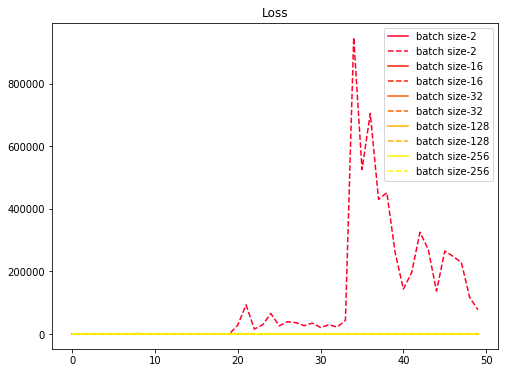

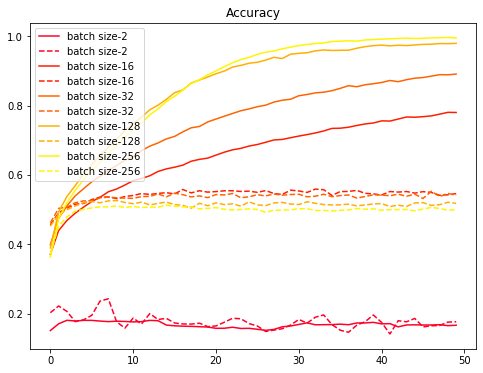

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()